In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import optuna

In [4]:
def load_data():    
    data = pd.read_csv('dataset.csv')
    X = data.drop('income', axis=1)
    y = data['income']
    return X, y

In [5]:
def build_model(trial, input_dim):
    model = Sequential()
    n_layers = trial.suggest_int("n_layers", 1, 5)

    # First Layer
    units = trial.suggest_int(f"n_units_0", 16, 128, step=16)
    model.add(Dense(units, activation="relu", input_dim=input_dim))  # input_dim specified
    dropout_rate = trial.suggest_float(f"dropout_rate_0", 0.0, 0.5)
    model.add(Dropout(dropout_rate))

    # Hidden Layers
    for i in range(n_layers):
        units = trial.suggest_int(f"n_units_{i}", 16, 128, step=16)
        model.add(Dense(units, activation="relu"))
        dropout_rate = trial.suggest_float(f"dropout_rate_{i}", 0.0, 0.5)
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=trial.suggest_float("lr", 1e-4, 1e-2, log=True)),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model


In [6]:
def objective(trial):
    X, y = load_data()
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model = build_model(trial, input_dim=X_train.shape[1])
        model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    return np.mean(accuracies)

In [7]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Best hyperparameters
print("Best hyperparameters:", study.best_params)

[I 2025-01-08 21:33:33,655] A new study created in memory with name: no-name-77f1324e-3585-4e0f-ae13-b4e884814fef


306/306 [==============================] - 0s 577us/step


[I 2025-01-08 21:34:37,165] Trial 0 finished with value: 0.8340567456316255 and parameters: {'n_layers': 2, 'n_units_0': 80, 'dropout_rate_0': 0.3833477986355386, 'n_units_1': 64, 'dropout_rate_1': 0.31603784982201816, 'lr': 0.0004065463305957174}. Best is trial 0 with value: 0.8340567456316255.


306/306 [==============================] - 0s 541us/step


[I 2025-01-08 21:35:38,170] Trial 1 finished with value: 0.8357970615903874 and parameters: {'n_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.12005524838408271, 'n_units_1': 16, 'dropout_rate_1': 0.34375272575931437, 'lr': 0.0006386346101051046}. Best is trial 1 with value: 0.8357970615903874.


306/306 [==============================] - 0s 566us/step


[I 2025-01-08 21:36:49,666] Trial 2 finished with value: 0.835039540326673 and parameters: {'n_layers': 3, 'n_units_0': 128, 'dropout_rate_0': 0.2103352644719227, 'n_units_1': 32, 'dropout_rate_1': 0.365260598815743, 'n_units_2': 32, 'dropout_rate_2': 0.33851130634121807, 'lr': 0.0017474664390635878}. Best is trial 1 with value: 0.8357970615903874.


306/306 [==============================] - 0s 590us/step


[I 2025-01-08 21:38:00,943] Trial 3 finished with value: 0.8327873341846113 and parameters: {'n_layers': 3, 'n_units_0': 64, 'dropout_rate_0': 0.47469330142082783, 'n_units_1': 80, 'dropout_rate_1': 0.13717212409479113, 'n_units_2': 128, 'dropout_rate_2': 0.015609137774324044, 'lr': 0.003151962306993578}. Best is trial 1 with value: 0.8357970615903874.


306/306 [==============================] - 0s 551us/step


[I 2025-01-08 21:39:08,321] Trial 4 finished with value: 0.836247459642894 and parameters: {'n_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.12391446795535888, 'n_units_1': 128, 'dropout_rate_1': 0.33100500105650127, 'lr': 0.00047650736120479306}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 535us/step


[I 2025-01-08 21:40:04,978] Trial 5 finished with value: 0.8336677202425999 and parameters: {'n_layers': 2, 'n_units_0': 16, 'dropout_rate_0': 0.05438037489007158, 'n_units_1': 128, 'dropout_rate_1': 0.42483344029547626, 'lr': 0.0005536796491775432}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 538us/step


[I 2025-01-08 21:40:51,133] Trial 6 finished with value: 0.8327668633559717 and parameters: {'n_layers': 1, 'n_units_0': 16, 'dropout_rate_0': 0.20172196438708712, 'lr': 0.0008982006329619887}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 533us/step


[I 2025-01-08 21:41:41,153] Trial 7 finished with value: 0.8337086849549742 and parameters: {'n_layers': 1, 'n_units_0': 48, 'dropout_rate_0': 0.26980357474063577, 'lr': 0.0002178862863761807}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 554us/step


[I 2025-01-08 21:42:36,677] Trial 8 finished with value: 0.8340977082480819 and parameters: {'n_layers': 2, 'n_units_0': 32, 'dropout_rate_0': 0.1976511099909416, 'n_units_1': 64, 'dropout_rate_1': 0.429959729773747, 'lr': 0.0005628588546838154}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 553us/step


[I 2025-01-08 21:43:37,054] Trial 9 finished with value: 0.8351623422434151 and parameters: {'n_layers': 2, 'n_units_0': 48, 'dropout_rate_0': 0.18763586200439997, 'n_units_1': 128, 'dropout_rate_1': 0.2795957826529554, 'lr': 0.00026803333801491184}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 549us/step


[I 2025-01-08 21:44:57,844] Trial 10 finished with value: 0.8219772716164364 and parameters: {'n_layers': 3, 'n_units_0': 128, 'dropout_rate_0': 0.017995884938386747, 'n_units_1': 96, 'dropout_rate_1': 0.14919351559065658, 'n_units_2': 112, 'dropout_rate_2': 0.4739184684606724, 'lr': 0.009271242943205334}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 567us/step


[I 2025-01-08 21:45:54,114] Trial 11 finished with value: 0.8349166399017971 and parameters: {'n_layers': 1, 'n_units_0': 96, 'dropout_rate_0': 0.09276038728483066, 'lr': 0.0001529260581892749}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 567us/step


[I 2025-01-08 21:46:53,427] Trial 12 finished with value: 0.8342409830893811 and parameters: {'n_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.12018191266971237, 'n_units_1': 16, 'dropout_rate_1': 0.2238533670834329, 'lr': 0.00010520015763216159}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 551us/step


[I 2025-01-08 21:47:53,854] Trial 13 finished with value: 0.8358174758292478 and parameters: {'n_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.2959632828399286, 'n_units_1': 32, 'dropout_rate_1': 0.01087552807588632, 'lr': 0.0016599340777807335}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 567us/step


[I 2025-01-08 21:49:01,571] Trial 14 finished with value: 0.8357560968780131 and parameters: {'n_layers': 3, 'n_units_0': 112, 'dropout_rate_0': 0.3085818277952286, 'n_units_1': 48, 'dropout_rate_1': 0.0028716855919634354, 'n_units_2': 16, 'dropout_rate_2': 0.02803253627515645, 'lr': 0.0017694082877163539}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 544us/step


[I 2025-01-08 21:49:56,318] Trial 15 finished with value: 0.8354489883382298 and parameters: {'n_layers': 1, 'n_units_0': 80, 'dropout_rate_0': 0.331557750431007, 'lr': 0.0044874766149468285}. Best is trial 4 with value: 0.836247459642894.


306/306 [==============================] - 0s 546us/step


[I 2025-01-08 21:51:03,115] Trial 16 finished with value: 0.8362884201634329 and parameters: {'n_layers': 2, 'n_units_0': 112, 'dropout_rate_0': 0.42704661509542063, 'n_units_1': 96, 'dropout_rate_1': 0.04099106974462052, 'lr': 0.0017028964624276148}. Best is trial 16 with value: 0.8362884201634329.


306/306 [==============================] - 0s 572us/step


[I 2025-01-08 21:52:17,973] Trial 17 finished with value: 0.8329714815179038 and parameters: {'n_layers': 3, 'n_units_0': 112, 'dropout_rate_0': 0.47703883807193764, 'n_units_1': 112, 'dropout_rate_1': 0.4984180944508975, 'n_units_2': 64, 'dropout_rate_2': 0.2178777466905794, 'lr': 0.0011429521309371934}. Best is trial 16 with value: 0.8362884201634329.


306/306 [==============================] - 0s 538us/step


[I 2025-01-08 21:53:17,768] Trial 18 finished with value: 0.834220466150551 and parameters: {'n_layers': 1, 'n_units_0': 112, 'dropout_rate_0': 0.41715575472008903, 'lr': 0.003419479712905945}. Best is trial 16 with value: 0.8362884201634329.


306/306 [==============================] - 0s 557us/step


[I 2025-01-08 21:54:19,450] Trial 19 finished with value: 0.8343843145204595 and parameters: {'n_layers': 2, 'n_units_0': 64, 'dropout_rate_0': 0.38137422267329274, 'n_units_1': 96, 'dropout_rate_1': 0.2009497293592265, 'lr': 0.00034239318973310393}. Best is trial 16 with value: 0.8362884201634329.


306/306 [==============================] - 0s 536us/step


[I 2025-01-08 21:55:30,429] Trial 20 finished with value: 0.8362474135327036 and parameters: {'n_layers': 2, 'n_units_0': 128, 'dropout_rate_0': 0.15994593638255677, 'n_units_1': 112, 'dropout_rate_1': 0.10670692599762514, 'lr': 0.0009463807823906034}. Best is trial 16 with value: 0.8362884201634329.


306/306 [==============================] - 0s 559us/step


[I 2025-01-08 21:56:42,137] Trial 21 finished with value: 0.8359812927603899 and parameters: {'n_layers': 2, 'n_units_0': 128, 'dropout_rate_0': 0.1419875391376474, 'n_units_1': 112, 'dropout_rate_1': 0.09626579482798042, 'lr': 0.001081423352887538}. Best is trial 16 with value: 0.8362884201634329.


306/306 [==============================] - 0s 562us/step


[I 2025-01-08 21:57:50,861] Trial 22 finished with value: 0.8354284797830708 and parameters: {'n_layers': 2, 'n_units_0': 112, 'dropout_rate_0': 0.06867572248312317, 'n_units_1': 112, 'dropout_rate_1': 0.06098877880932977, 'lr': 0.0007493766442082984}. Best is trial 16 with value: 0.8362884201634329.


306/306 [==============================] - 0s 566us/step


[I 2025-01-08 21:59:02,505] Trial 23 finished with value: 0.8356127235285798 and parameters: {'n_layers': 2, 'n_units_0': 128, 'dropout_rate_0': 0.15647902197339542, 'n_units_1': 96, 'dropout_rate_1': 0.07231615916938444, 'lr': 0.0023756885461319642}. Best is trial 16 with value: 0.8362884201634329.


306/306 [==============================] - 0s 564us/step


[I 2025-01-08 22:00:13,624] Trial 24 finished with value: 0.8368207015304978 and parameters: {'n_layers': 2, 'n_units_0': 112, 'dropout_rate_0': 0.24285812401830775, 'n_units_1': 128, 'dropout_rate_1': 0.17106016626081927, 'lr': 0.0012841032227776537}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 553us/step


[I 2025-01-08 22:01:13,444] Trial 25 finished with value: 0.836534097354038 and parameters: {'n_layers': 1, 'n_units_0': 112, 'dropout_rate_0': 0.2511143644624594, 'lr': 0.0012876552593722936}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 553us/step


[I 2025-01-08 22:02:12,360] Trial 26 finished with value: 0.834241016624065 and parameters: {'n_layers': 1, 'n_units_0': 112, 'dropout_rate_0': 0.24836042932036548, 'lr': 0.005451790293971133}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 549us/step


[I 2025-01-08 22:03:07,416] Trial 27 finished with value: 0.8348552295117961 and parameters: {'n_layers': 1, 'n_units_0': 80, 'dropout_rate_0': 0.3579189936937835, 'lr': 0.0023148090736958195}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 582us/step


[I 2025-01-08 22:04:06,921] Trial 28 finished with value: 0.8355103630976289 and parameters: {'n_layers': 1, 'n_units_0': 112, 'dropout_rate_0': 0.42476724809315486, 'lr': 0.001506982011571822}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 564us/step


[I 2025-01-08 22:05:20,768] Trial 29 finished with value: 0.8353465922766773 and parameters: {'n_layers': 3, 'n_units_0': 80, 'dropout_rate_0': 0.26919761149586774, 'n_units_1': 80, 'dropout_rate_1': 0.17335261068244984, 'n_units_2': 80, 'dropout_rate_2': 0.2040393312644303, 'lr': 0.0023558546410031495}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 539us/step


[I 2025-01-08 22:06:19,388] Trial 30 finished with value: 0.8358174464863992 and parameters: {'n_layers': 1, 'n_units_0': 96, 'dropout_rate_0': 0.23444319020698218, 'lr': 0.0014503032059867773}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 643us/step


[I 2025-01-08 22:07:30,172] Trial 31 finished with value: 0.8349166042711953 and parameters: {'n_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.34443141478331374, 'n_units_1': 128, 'dropout_rate_1': 0.26235320422039704, 'lr': 0.00043296622594208916}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 561us/step


[I 2025-01-08 22:08:43,695] Trial 32 finished with value: 0.8346299686559693 and parameters: {'n_layers': 2, 'n_units_0': 112, 'dropout_rate_0': 0.0066641355050671425, 'n_units_1': 128, 'dropout_rate_1': 0.21787542036354246, 'lr': 0.0007455106500734884}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 544us/step


[I 2025-01-08 22:09:51,715] Trial 33 finished with value: 0.8363907386760289 and parameters: {'n_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.4124662216087495, 'n_units_1': 96, 'dropout_rate_1': 0.3047688052661746, 'lr': 0.0012269909511610077}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 620us/step


[I 2025-01-08 22:11:11,259] Trial 34 finished with value: 0.8361246137118796 and parameters: {'n_layers': 3, 'n_units_0': 128, 'dropout_rate_0': 0.4372842540084364, 'n_units_1': 80, 'dropout_rate_1': 0.0482063111239836, 'n_units_2': 64, 'dropout_rate_2': 0.47012205851001315, 'lr': 0.001133008305722953}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 595us/step


[I 2025-01-08 22:12:17,274] Trial 35 finished with value: 0.8344661601084982 and parameters: {'n_layers': 2, 'n_units_0': 80, 'dropout_rate_0': 0.38635968410645655, 'n_units_1': 96, 'dropout_rate_1': 0.2914260789013081, 'lr': 0.0028953013826002387}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 546us/step


[I 2025-01-08 22:13:26,346] Trial 36 finished with value: 0.8343637808142874 and parameters: {'n_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.44523931519512316, 'n_units_1': 112, 'dropout_rate_1': 0.38395279296067747, 'lr': 0.0013763752320901004}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 605us/step


[I 2025-01-08 22:14:36,967] Trial 37 finished with value: 0.8342818367181148 and parameters: {'n_layers': 2, 'n_units_0': 112, 'dropout_rate_0': 0.40209415034851753, 'n_units_1': 96, 'dropout_rate_1': 0.17335560999779184, 'lr': 0.001913037368704645}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 557us/step


[I 2025-01-08 22:15:51,739] Trial 38 finished with value: 0.8342614308629255 and parameters: {'n_layers': 3, 'n_units_0': 96, 'dropout_rate_0': 0.49333122228744125, 'n_units_1': 64, 'dropout_rate_1': 0.11991733967611728, 'n_units_2': 96, 'dropout_rate_2': 0.3358142018079787, 'lr': 0.0007223555896268984}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 548us/step


[I 2025-01-08 22:16:53,499] Trial 39 finished with value: 0.8339747910558637 and parameters: {'n_layers': 2, 'n_units_0': 64, 'dropout_rate_0': 0.4562270928826208, 'n_units_1': 80, 'dropout_rate_1': 0.22943233016229458, 'lr': 0.0008679836292888265}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 559us/step


[I 2025-01-08 22:17:53,682] Trial 40 finished with value: 0.8323982291507116 and parameters: {'n_layers': 1, 'n_units_0': 112, 'dropout_rate_0': 0.2985141611764541, 'lr': 0.004356186469602337}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 559us/step


[I 2025-01-08 22:19:01,554] Trial 41 finished with value: 0.8362883845328313 and parameters: {'n_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.2232767960651742, 'n_units_1': 128, 'dropout_rate_1': 0.3168850816957337, 'lr': 0.00045014148669169745}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 594us/step


[I 2025-01-08 22:20:19,367] Trial 42 finished with value: 0.8357765236923799 and parameters: {'n_layers': 2, 'n_units_0': 128, 'dropout_rate_0': 0.23185491299512717, 'n_units_1': 112, 'dropout_rate_1': 0.3019318124818793, 'lr': 0.000566829675244651}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 769us/step


[I 2025-01-08 22:21:31,483] Trial 43 finished with value: 0.8365341036417913 and parameters: {'n_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.2168833165911092, 'n_units_1': 128, 'dropout_rate_1': 0.33276974185139396, 'lr': 0.00033359558443476036}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 789us/step


[I 2025-01-08 22:22:59,591] Trial 44 finished with value: 0.8358174779251655 and parameters: {'n_layers': 2, 'n_units_0': 112, 'dropout_rate_0': 0.18278154853162587, 'n_units_1': 112, 'dropout_rate_1': 0.39777768436415123, 'lr': 0.00033794849058822805}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 789us/step


[I 2025-01-08 22:24:25,430] Trial 45 finished with value: 0.8355513152344967 and parameters: {'n_layers': 2, 'n_units_0': 96, 'dropout_rate_0': 0.2750427224371685, 'n_units_1': 48, 'dropout_rate_1': 0.3483907367651375, 'lr': 0.001270190998318417}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 759us/step


[I 2025-01-08 22:25:49,959] Trial 46 finished with value: 0.8335244370176298 and parameters: {'n_layers': 2, 'n_units_0': 64, 'dropout_rate_0': 0.3618831739741504, 'n_units_1': 96, 'dropout_rate_1': 0.2764860761558017, 'lr': 0.00018829285227566517}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 739us/step


[I 2025-01-08 22:27:25,601] Trial 47 finished with value: 0.8361041135403916 and parameters: {'n_layers': 2, 'n_units_0': 112, 'dropout_rate_0': 0.2571040891607223, 'n_units_1': 128, 'dropout_rate_1': 0.24593610032897617, 'lr': 0.0008601019792214488}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 782us/step


[I 2025-01-08 22:28:57,854] Trial 48 finished with value: 0.8356741905083599 and parameters: {'n_layers': 3, 'n_units_0': 96, 'dropout_rate_0': 0.20680649687142807, 'n_units_1': 80, 'dropout_rate_1': 0.3297368939348096, 'n_units_2': 32, 'dropout_rate_2': 0.13543912510052417, 'lr': 0.0018308472861731078}. Best is trial 24 with value: 0.8368207015304978.


306/306 [==============================] - 0s 705us/step


[I 2025-01-08 22:30:22,033] Trial 49 finished with value: 0.8361245885608666 and parameters: {'n_layers': 2, 'n_units_0': 80, 'dropout_rate_0': 0.32823436259688943, 'n_units_1': 128, 'dropout_rate_1': 0.363326594569845, 'lr': 0.0006482714139084163}. Best is trial 24 with value: 0.8368207015304978.


Best hyperparameters: {'n_layers': 2, 'n_units_0': 112, 'dropout_rate_0': 0.24285812401830775, 'n_units_1': 128, 'dropout_rate_1': 0.17106016626081927, 'lr': 0.0012841032227776537}


In [ ]:
import optuna.visualization as vis
fig = vis.plot_optimization_history(study)
fig.show()

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

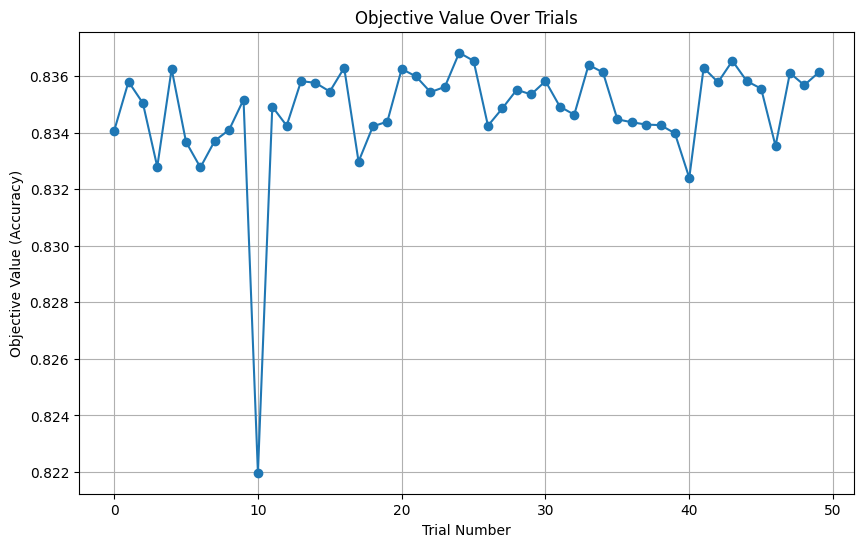

In [16]:
import matplotlib.pyplot as plt

# Extract data from the study
trials = study.trials
values = [trial.value for trial in trials if trial.value is not None]
trial_numbers = range(len(values))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(trial_numbers, values, marker='o', linestyle='-')
plt.title('Objective Value Over Trials')
plt.xlabel('Trial Number')
plt.ylabel('Objective Value (Accuracy)')
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Extract the number of layers and the corresponding objective values (accuracy)
n_layers = [trial.params['n_layers'] for trial in study.trials if trial.value is not None]
accuracies = [trial.value for trial in study.trials if trial.value is not None]

# Create a scatter plot (or you can use a line plot if preferred)
plt.figure(figsize=(10, 6))
plt.scatter(n_layers, accuracies, c='blue', alpha=0.6)
plt.title('Accuracy vs. Number of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.grid(True)

NameError: name 'study' is not defined

In [ ]:
import seaborn as sns

# Extract the number of layers and accuracies
n_layers = [trial.params['n_layers'] for trial in study.trials if trial.value is not None]
accuracies = [trial.value for trial in study.trials if trial.value is not None]

# Combine into a DataFrame for easier plotting
import pandas as pd
data = pd.DataFrame({'n_layers': n_layers, 'accuracy': accuracies})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='n_layers', y='accuracy', data=data, palette='Set2')

# Customize the plot
plt.title('Accuracy vs. Number of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.grid(axis='y')  # Add gridlines for easier comparison
plt.show()